<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></div>

In [1]:
## Load libraries and env settings 
%run "../../zUtilz/load_envz.ipynb"
## TODO: refactor 
%run "../../zUtilz/LG_load_envz.ipynb"

In [4]:
## Load dataset
db = pd.read_csv( "%s/KNBS_et_al/county-government-expenditure-2013-2014.csv" % DATA_DIR) 

## Clean
#db.rename(index=str, columns={"2013*":"2013"}, inplace=True)
#db.drop(10, inplace=True)
#db.T.head(40)
db.tail()

,County,Acquisition of Non-financial Assets,"Communication, Supplies and Services",Compensation of Employees,Debt Repayment & Pending Bills,Fuel Oil and Lubricants,Hospitality Supplies and Services,Office and General Supplies and Services,Other Operating Expenses,"Printing , Advertising and Information Supplies and Services",Routine Maintenance,Total Expenditure,Training Expenses,Transportation Costs,Utilities Supplies and Services
42,Turkana,562.199113,4.956055,209.682521,0.0,24.025977,9.671455,20.583678,240.981526,9.867832,8.282760,1204.736987,19.774033,91.778658,2.933379
43,Uasin Gishu,53.193684,3.010425,429.255853,0.0,0.000000,28.186435,5.070389,27.647027,13.148783,41.903674,691.383940,13.715252,65.626530,10.625888
44,Vihiga,80.126936,0.997831,146.609535,0.0,4.618125,17.167900,12.559529,54.233536,6.562373,22.597324,424.478162,16.054090,54.153251,8.797732
45,Wajir,181.016700,5.805050,315.918313,0.0,8.785858,5.125445,4.332016,159.222176,5.273012,49.023230,775.289118,2.304730,37.381948,1.100640
46,West Pokot,38.161950,2.008999,362.448753,0.0,18.547531,8.617850,2.847183,8.083146,3.905400,3.363120,491.674271,20.382087,18.459571,4.848681


In [5]:
# wrangle 
#db = pd.DataFrame( pd.melt(db, 
#                           id_vars="Type of Personnel Over the Years", 
#                           value_vars=["{:02d}".format(x) for x in range(2000, 2014)],
#                          value_name="Nmb.Staff", var_name="Year") )
#help(pd.melt)
#db.head()

In [10]:
## Compute

db["Prop.Salaries"] = np.nan_to_num( db["Compensation of Employees"]/db["Total Expenditure"])


# Introduction

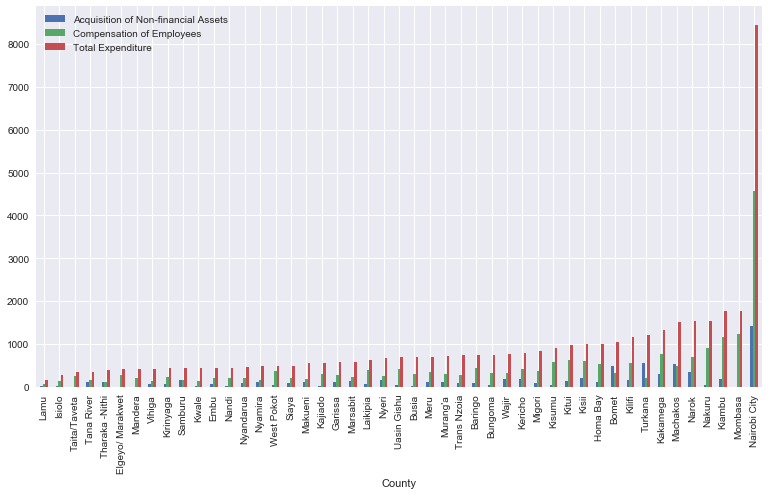

In [16]:
pd.pivot_table( db, index=["County"], values=["Total Expenditure", "Compensation of Employees", "Acquisition of Non-financial Assets"], 
               aggfunc=sum ).sort_values(("Total Expenditure")).plot( kind="bar", figsize=(13,7))



 Staffing Heavy Counties


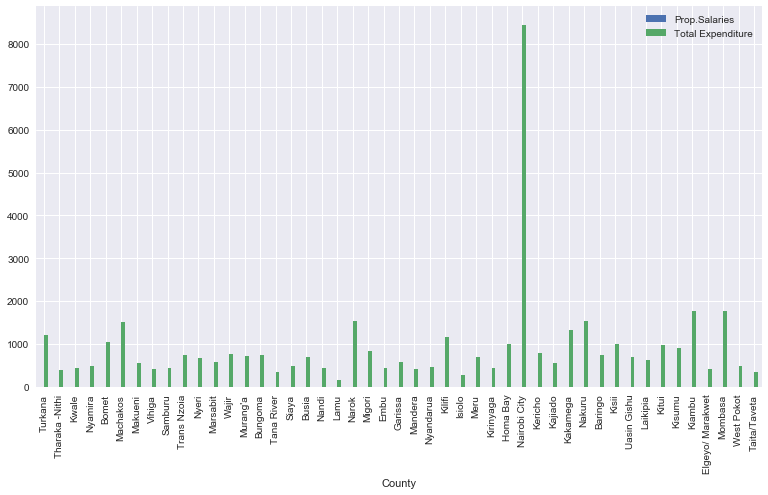

In [18]:
print("\n\n Staffing Heavy Counties")
pd.pivot_table( db, index=["County"], values=["Prop.Salaries", "Total Expenditure" ], 
               aggfunc=sum ).sort_values(("Prop.Salaries")).plot( kind="bar", figsize=(13,7))